In [366]:
import pandas as pd
import numpy as np
import random
# change code cells width
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns

In [367]:
pd.set_option('display.max_columns', None)

In [368]:
df = pd.read_csv("../data/train.csv")
df

,id,id_sreality,street,district,county,address,disposition,description,price,currency,download_date,price_note,structure,building_state,ownership,floor,area,area_floor,energy_performance,balcony_exist,balcony,elevator,cellar_exist,cellar,furnished,barrier_free,lodge_exist,lodge,terace_exist,terace,area_built_up,area_garden,garage_exist,garage,starting_price,flat_type,latitude,longitude
0,0,211172956,Konžská,Vokovice,Praha 6,"Konžská, Praha 6 - Vokovice",2+1,"AKCE = Stát slíbil, že se nebude platit 4% d...",5460000.0,Kč,2020-05-21 00:00:00,AKCE garance neplacení daně z nabytí nemovitosti,Panelová,Po rekonstrukci,Osobní,5,54,54.0,Třída G - Mimořádně nehospodárná č. 78/2013 Sb...,NaN,NaN,1.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.096155,14.351234
1,1,211680348,Koperníkova,Židenice,Brno,"Koperníkova, Brno - Židenice",2+kk,"Novostavba luxusního bytu 2+kk s terasou, nová...",6740000.0,Kč,2020-10-30 00:00:00,NaN,Cihlová,Novostavba,Osobní,4,76,67.0,Třída A - Mimořádně úsporná,NaN,NaN,1.0,NaN,NaN,true,NaN,NaN,NaN,1.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,49.201747,16.637873
2,2,221724252,Pekařská,Frýdek,Frýdek-Místek,"Pekařská, Frýdek-Místek - Frýdek",3+1,"Prodej bytu 3+1 v os. vl., 76 m2, 1.NP, na ul....",1590000.0,Kč,2020-03-30 00:00:00,NaN,Panelová,Po rekonstrukci,Osobní,1,76,NaN,NaN,NaN,NaN,1.0,1.0,6.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.678780,18.358891
3,3,216161372,U Mlékárny,NaN,Bystřice pod Hostýnem,"U Mlékárny, Bystřice pod Hostýnem",3+1,Naše společnost Vám zprostředkuje Nabízíme Vám...,2590000.0,Kč,2020-12-27 00:00:00,včetně provize,Cihlová,Velmi dobrý,Osobní,3,80,80.0,Třída G - Mimořádně nehospodárná,1.0,NaN,NaN,1.0,NaN,false,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.402031,17.677481
4,4,216358492,Na křečku,Horní Měcholupy,Praha 10,"Na křečku, Praha 10 - Horní Měcholupy",3+1,"Ul. Na Křečku, klidné místo sídliště Horní Měc...",4790000.0,Kč,2020-06-19 00:00:00,Přímý majitel-neplatíte provizi RK,Panelová,Velmi dobrý,Osobní,2,78,71.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.043005,14.561770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48658,48658,4285537372,Horoušanská,NaN,Nehvizdy,"Horoušanská, Nehvizdy",1+kk,Prodej malého bytu v Nehvizdech (Praha-Východ)...,1290000.0,Kč,2020-11-27 00:00:00,NaN,Panelová,Dobrý,Osobní,1,17,17.0,NaN,NaN,NaN,0.0,NaN,NaN,Částečně,0.0,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,50.117336,14.732274
48659,48659,4285582940,Smetanova,NaN,Zlín,"Smetanova, Zlín",3+kk,"Poslední volný byt s vlastní zahradou, včetně ...",4998500.0,Kč,2020-06-08 00:00:00,"za standardní vybavení na klíč, včetně sklepa,...",Cihlová,Novostavba,Osobní,1,77,NaN,Třída B - Velmi úsporná č. 78/2013 Sb. podle v...,NaN,NaN,NaN,1.0,4.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.230147,17.664527
48660,48660,4287508060,Pražská,NaN,Znojmo,"Pražská, Znojmo",3+1,Nabízíme k prodeji byt 3+1 ve čtvrtém nadze...,2400000.0,Kč,2020-05-31 00:00:00,"včetně poplatků, + provize RK, včetně právního...",Panelová,Dobrý,Osobní,4,72,NaN,Třída G - Mimořádně nehospodárná,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.867792,16.033927
48661,48661,4287560796,Filipova,Bystrc,Brno,"Filipova, Brno - Bystrc",3+1,Brněnská přehrada je oblíbenou lokalitou pro v...,4450000.0,Kč,2020-10-30 00:00:00,"Majitel si vyhrazuje právo, prodat nemovitost ...",Panelová,Před rekonstrukcí,Osobní,4,76,NaN,Třída G - Mimořádně nehospodárná,NaN,NaN,0.0,NaN,NaN,Částečně,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.219693,16.525947


In [369]:
df.isnull().sum()

id                        0
id_sreality               0
street                  723
district              18155
county                    0
address                   0
disposition               0
description               0
price                     0
currency                  0
download_date             0
price_note            24279
structure                 0
building_state            0
ownership                 0
floor                     0
area                      0
area_floor            17116
energy_performance     6307
balcony_exist         35591
balcony               41322
elevator              14704
cellar_exist          16511
cellar                31167
furnished             23932
barrier_free          35157
lodge_exist           37194
lodge                 43349
terace_exist          44737
terace                45788
area_built_up         47862
area_garden           47733
garage_exist          44360
garage                44360
starting_price        48663
flat_type           

In [370]:
def nunique_null_sum(df):
    print(f'Unique valuse {df.unique()}')
    print(f'Unique valuse {df.nunique()}')
    print(f'How many values {df.count()}')
    print(f'How many null {df.isnull().sum()}')

## Czyszczenie danych 

### Badanie


In [371]:
nunique_null_sum(df['id'])


Unique valuse [    0     1     2 ... 48660 48661 48662]
Unique valuse 48663
How many values 48663
How many null 0


In [372]:
nunique_null_sum(df['download_date'])

Unique valuse ['2020-05-21 00:00:00' '2020-10-30 00:00:00' '2020-03-30 00:00:00'
 '2020-12-27 00:00:00' '2020-06-19 00:00:00' '2020-09-02 00:00:00'
 '2020-09-18 00:00:00' '2020-12-22 00:00:00' '2020-04-29 00:00:00'
 '2020-11-27 00:00:00' '2020-06-09 00:00:00' '2020-05-18 00:00:00'
 '2020-04-30 00:00:00' '2020-06-02 00:00:00' '2020-07-08 00:00:00'
 '2020-05-30 00:00:00' '2020-05-08 00:00:00' '2020-05-17 00:00:00'
 '2020-09-15 00:00:00' '2020-11-17 00:00:00' '2020-11-30 00:00:00'
 '2020-08-31 00:00:00' '2020-04-17 00:00:00' '2020-04-27 00:00:00'
 '2020-07-17 00:00:00' '2020-05-28 00:00:00' '2020-07-02 00:00:00'
 '2020-03-25 00:00:00' '2020-12-14 00:00:00' '2020-08-06 00:00:00'
 '2020-06-15 00:00:00' '2020-09-16 00:00:00' '2020-09-10 00:00:00'
 '2020-05-11 00:00:00' '2020-09-14 00:00:00' '2020-06-30 00:00:00'
 '2020-07-28 00:00:00' '2020-12-25 00:00:00' '2020-11-24 00:00:00'
 '2020-09-22 00:00:00' '2020-08-07 00:00:00' '2020-10-05 00:00:00'
 '2020-10-13 00:00:00' '2020-11-12 00:00:00' '20

In [373]:
nunique_null_sum(df['id_sreality'])

Unique valuse [ 211172956  211680348  221724252 ... 4287508060 4287560796 4291357788]
Unique valuse 48663
How many values 48663
How many null 0


In [374]:
nunique_null_sum(df['furnished'])

Unique valuse [nan 'true' 'false' 'Částečně']
Unique valuse 3
How many values 24731
How many null 23932


In [375]:
furnished = {'true': 1,
             'false': 0,
             np.NaN: 0,
             'Částečně': 0.5}

df['furnished'] = df['furnished'].map(furnished)

In [376]:
nunique_null_sum(df['currency'])

Unique valuse ['Kč']
Unique valuse 1
How many values 48663
How many null 0


In [377]:
nunique_null_sum(df['description'])

Unique valuse ['AKCE =   Stát slíbil, že se nebude platit 4% daň z koupě nemovitosti staršího bytu a my to vítáme. Nicméně ještě musí vládní návrh schválit parlament, senát, prezident a úředníci musí připravit metodiku. Kdyby se to kdekoliv zaseklo a daň se nezrušila, my vám garantujeme, že pokud koupíte byt od nás během května  června /podepsaná Rezervační smlouva/, tak za Vás daň uhradíme formou slevy na ceně bytu.\r\n\r\nNabízíme k prodeji cihlový byt 2+1, na ulici Koňžská 4, který bude po kompletní rekonstrukci a připravený k předání dne 4.6.2020. Při rekonstrukci používáme kvalitní materiály. Kompletní seznam vybavení a použitých materiálů Vám rádi zašleme  na e-mail. Vizualizace jsou ilustrační znázornění budoucího vzhledu jednotky. Změny jsou vyhrazeny.\r\n\r\nPodlahová plocha bytu činí 54m2. \r\n\r\n\r\nNachází se v 5. nadzemním podlaží s výtahem a orientací na západní stranu. K bytu náleží balkon, který je situován v mezipatře domu.\r\n\r\nByt se nabízí bez nábytku. Bude zde n

In [378]:
nunique_null_sum(df['street'])

Unique valuse ['Konžská' 'Koperníkova' 'Pekařská' ... 'V Jamce' 'V Parku' 'U Náspu']
Unique valuse 6904
How many values 47940
How many null 723


In [379]:
nunique_null_sum(df['district']) 

Unique valuse ['Vokovice' 'Židenice' 'Frýdek' nan 'Horní Měcholupy' 'Holešovice'
 'Michle' 'Rýnovice' 'Žižkov' 'Košíře' 'Podolí' 'Moravské Předměstí'
 'Libeň' 'Dejvice' 'Doubí' 'Kudlov' 'Zbraslav' 'Vršovice' 'Beroun-Město'
 'Záběhlice' 'Staré Město' 'Kobylisy' 'Jižní Předměstí'
 'České Budějovice 2' 'Děčín XXVII-Březiny' 'Vinohrady' 'Hloubětín'
 'Příbram VII' 'Nové Město' 'Karlín' 'Moravská Ostrava' 'Ráj' 'Božkov'
 'Liberec XX-Ostašov' 'Nusle' 'Předměstí' 'Mojžíř' 'Pitkovice' 'Krč'
 'Borovina' 'Vyškov-Předměstí' 'Radošovice' 'Vysočany' 'Letňany'
 'Žabovřesky' 'Smíchov' 'Liberec VI-Rochlice' 'Strašnice' 'Ďáblice'
 'Husovice' 'Chodov' 'Brno-město' 'Rybáře' 'Příbram IV' 'Zelené Předměstí'
 'České Budějovice 3' 'Hlubočepy' 'Brandýs nad Labem'
 'Budějovické Předměstí' 'Šumbark' 'Bohatice' 'Klatovy III' 'Háje'
 'Praha 5' 'Malešice' 'Přerov I-Město' 'Chomoutov' 'Nový Hradec Králové'
 'Modřany' 'Čakovice' 'Lesná' 'Janov' 'Soběslav II' 'Lutyně' 'Poruba'
 'Bílé Předměstí' 'Výškovice' 'Záblatí' '

In [380]:
nunique_null_sum(df['price_note'])

Unique valuse ['AKCE  garance neplacení daně z nabytí nemovitosti' nan 'včetně provize'
 ...
 'vč. sklepa a vč. garážvého parkovacího stání, + provize RK, cena bez daně z nabytí'
 'za standardní vybavení na klíč, včetně sklepa, venkovního parkovacího stání a zahrady'
 'Majitel si vyhrazuje právo, prodat nemovitost nejvyšší možné nabídce, včetně DPH, včetně poplatků, včetně provize, včetně právního servisu']
Unique valuse 6461
How many values 24384
How many null 24279


In [381]:
nunique_null_sum(df['starting_price'])

Unique valuse [nan]
Unique valuse 0
How many values 0
How many null 48663


In [382]:
nunique_null_sum(df['address'])

Unique valuse ['Konžská, Praha 6 - Vokovice' 'Koperníkova, Brno - Židenice'
 'Pekařská, Frýdek-Místek - Frýdek' ... 'V Parku, Načeradec'
 'Chodská, Trutnov - Horní Předměstí'
 'U Náspu, Liberec - Liberec I-Staré Město']
Unique valuse 13040
How many values 48663
How many null 0


In [383]:
nunique_null_sum(df['county'])

Unique valuse ['Praha 6' 'Brno' 'Frýdek-Místek' 'Bystřice pod Hostýnem' 'Praha 10'
 'Praha 7' 'Praha 4' 'Jablonec nad Nisou' 'Praha 3' 'Fryšták' 'Praha 5'
 'Žatec' 'Vsetín' 'Hradec Králové' 'Praha 8' 'Olomouc' 'Zlín'
 'Karlovy Vary' 'Praha' 'Náchod' 'Grygov' 'Beroun' 'Milovice' 'Praha 1'
 'Plzeň' 'Třemošnice' 'okres Praha-východ' 'okres Beroun'
 'České Budějovice' 'Děčín' 'Chomutov' 'Příbram' 'Ostrava' 'Karviná'
 'Nové Město na Moravě' 'Klášterec nad Ohří' 'Liberec' 'Opava' 'Ostrov'
 'Ústí nad Labem' 'Adamov' 'okres Cheb' 'Třebíč' 'okres Břeclav' 'Most'
 'Vyškov' 'Říčany' 'Šternberk' 'Praha 9' 'Hrušovany u Brna'
 'okres Český Krumlov' 'Praha 2' 'Jeseník' 'okres Tábor'
 'okres Plzeň-město' 'okres Karviná' 'Slaný' 'Pardubice' 'okres Písek'
 'Kladno' 'Brandýs nad Labem-Stará Boleslav' 'okres Strakonice'
 'okres Zlín' 'Havlíčkův Brod' 'okres České Budějovice' 'okres Nymburk'
 'Písek' 'Havířov' 'Teplice' 'Nupaky' 'Klatovy' 'okres Opava' 'Letovice'
 'Přerov' 'Prostějov' 'okres Ostrava-město'

In [384]:
nunique_null_sum(df['disposition'])

Unique valuse ['2+1' '2+kk' '3+1' '4+kk' '1+1' '3+kk' '1+kk' '5+kk' '4+1' 'Atypický'
 '5+1' '6 a více']
Unique valuse 12
How many values 48663
How many null 0


In [385]:
disposition = {'2+1':3,
               '2+kk': 3,
               '3+1': 4,
               '4+kk': 5,
               '1+1': 2,
               '3+kk': 4,
               '1+kk': 2,
               '5+kk': 6,
               '4+1': 5,
               'Atypický': -1,
               '5+1': 6,
               '6 a více': 7}

df['disposition'] = df['disposition'].map(disposition)

In [386]:
nunique_null_sum(df['building_state'])


Unique valuse ['Po rekonstrukci' 'Novostavba' 'Velmi dobrý' 'Projekt'
 'Před rekonstrukcí' 'Dobrý' 'Ve výstavbě' 'Špatný' 'K demolici']
Unique valuse 9
How many values 48663
How many null 0


In [387]:
building_state = {'Novostavba':9,
        'Velmi dobrý':8,
        'Po rekonstrukci':7,
        'Dobrý':6,
        'Před rekonstrukcí':5,
        'Ve výstavbě':4,
        'Špatný':3,
        'K demolici':2,
        'Projekt':1}
df['building_state'] = df['building_state'].map(building_state)

In [388]:
nunique_null_sum(df['energy_performance'])

Unique valuse ['Třída G - Mimořádně nehospodárná č. 78/2013 Sb. podle vyhlášky'
 'Třída A - Mimořádně úsporná' nan 'Třída G - Mimořádně nehospodárná'
 'Třída B - Velmi úsporná'
 'Třída D - Méně úsporná č. 78/2013 Sb. podle vyhlášky'
 'Třída G - Mimořádně nehospodárná č. 148/2007 Sb. podle vyhlášky'
 'Třída B - Velmi úsporná č. 78/2013 Sb. podle vyhlášky'
 'Třída D - Méně úsporná' 'Třída C - Úsporná'
 'Třída C - Úsporná č. 78/2013 Sb. podle vyhlášky'
 'Třída B - Velmi úsporná č. 148/2007 Sb. podle vyhlášky'
 'Třída E - Nehospodárná'
 'Třída A - Mimořádně úsporná č. 78/2013 Sb. podle vyhlášky'
 'Třída C - Úsporná č. 148/2007 Sb. podle vyhlášky'
 'Třída E - Nehospodárná č. 78/2013 Sb. podle vyhlášky'
 'Třída D - Méně úsporná č. 148/2007 Sb. podle vyhlášky'
 'Třída E - Nehospodárná č. 148/2007 Sb. podle vyhlášky'
 'Třída F - Velmi nehospodárná č. 78/2013 Sb. podle vyhlášky'
 'Třída F - Velmi nehospodárná'
 'Třída F - Velmi nehospodárná č. 148/2007 Sb. podle vyhlášky'
 'Třída A - Mimořádně 

In [389]:
energy_performance = {
       'Třída G - Mimořádně nehospodárná č. 78/2013 Sb. podle vyhlášky': 7,
       'Třída A - Mimořádně úsporná': 1, np.NaN: 8,
       'Třída G - Mimořádně nehospodárná':7, 
       'Třída B - Velmi úsporná': 2,
       'Třída D - Méně úsporná č. 78/2013 Sb. podle vyhlášky':4,
       'Třída G - Mimořádně nehospodárná č. 148/2007 Sb. podle vyhlášky':1,
       'Třída B - Velmi úsporná č. 78/2013 Sb. podle vyhlášky':2,
       'Třída D - Méně úsporná':4,
       'Třída C - Úsporná':3,
       'Třída C - Úsporná č. 78/2013 Sb. podle vyhlášky':3,
       'Třída B - Velmi úsporná č. 148/2007 Sb. podle vyhlášky':2,
       'Třída E - Nehospodárná':5,
       'Třída A - Mimořádně úsporná č. 78/2013 Sb. podle vyhlášky':1,
       'Třída C - Úsporná č. 148/2007 Sb. podle vyhlášky':3,
       'Třída E - Nehospodárná č. 78/2013 Sb. podle vyhlášky':5,
       'Třída D - Méně úsporná č. 148/2007 Sb. podle vyhlášky':4,
       'Třída E - Nehospodárná č. 148/2007 Sb. podle vyhlášky':5,
       'Třída F - Velmi nehospodárná č. 78/2013 Sb. podle vyhlášky':6,
       'Třída F - Velmi nehospodárná':6,
       'Třída F - Velmi nehospodárná č. 148/2007 Sb. podle vyhlášky':6,
       'Třída A - Mimořádně úsporná č. 148/2007 Sb. podle vyhlášky':1,
       'Třída D - Méně úsporná č. 264/2020 Sb. podle vyhlášky':4,
       'Třída B - Velmi úsporná č. 264/2020 Sb. podle vyhlášky':2,}

df['energy_performance'] = df['energy_performance'].map(energy_performance)

In [390]:
nunique_null_sum(df['flat_type'])

Unique valuse [nan 'Mezonet' 'Podkrovní' 'Loft']
Unique valuse 3
How many values 659
How many null 48004


In [391]:
nunique_null_sum(df['floor'])

Unique valuse [  5   4   1   3   2   8   6   7   0  12  -1   9  13  11  10  99  15  32
  19  18  -2  16  14  17  20  21  24  -3  23 127  78  86  56]
Unique valuse 33
How many values 48663
How many null 0


In [392]:
nunique_null_sum(df['area'])

Unique valuse [  54   76   80   78  113   34  109   77   45   30   72   29  135   38
   50   35   93   58   37   75   85  150   82   91   57  155   60   86
   63   66   83   44   71   61  132   79   65   89   68   32   22   96
   67   31   23   41   33   70   39  116   19   56  120   64  106   74
  110   51  143   46   40   49   55  159  130  138   92  178   95   53
   36   42   27  156  149  102  160   90   73   43  103   52   59   28
  198   62   69  112   25  105   47   81   15  101  114   97  208   94
   48   20  104  117  118   98  820   18  119  100   87  108  133  129
   84   26  205   88  111  122  251  163  291  188  115  123  125  126
  140   24  302   99  196  148   17  121   21  170   16  376  373  184
  131  165  145  180  152  202  107  142  136  204  193  124  127  186
  194  284  157  182  222  128  151  167  162  174  211  166  144  176
  161  197  146  227  185  229  190  641  158  147  175  139  268  141
  134  173  154  225  164  220  191  335  294  418  200  179  1

In [393]:
nunique_null_sum(df['area_floor'])

Unique valuse [ 5.4000e+01  6.7000e+01         nan  8.0000e+01  7.1000e+01  1.1300e+02
  1.0900e+02  7.7000e+01  4.5000e+01  3.0000e+01  7.2000e+01  2.7000e+01
  3.8000e+01  9.3000e+01  5.8000e+01  7.5000e+01  8.5000e+01  1.5000e+02
  8.2000e+01  8.3000e+01  5.3000e+01  3.4000e+01  6.0000e+01  6.6000e+01
  4.4000e+01  7.9000e+01  5.0000e+01  3.2000e+01  2.2000e+01  5.7000e+01
  9.6000e+01  3.1000e+01  7.8000e+01  4.1000e+01  3.9000e+01  5.6000e+01
  7.3000e+01  6.2000e+01  3.3000e+01  1.1600e+02  7.4000e+01  1.1000e+02
  5.1000e+01  1.4300e+02  7.6000e+01  4.8000e+01  4.9000e+01  5.5000e+01
  7.0000e+01  1.5900e+02  3.5000e+01  1.3900e+02  9.2000e+01  1.1700e+02
  8.4000e+01  5.2000e+01  3.6000e+01  4.2000e+01  1.5600e+02  1.4900e+02
  9.5000e+01  8.6000e+01  1.6000e+02  9.0000e+01  6.5000e+01  4.3000e+01
  1.0300e+02  2.8000e+01  1.7600e+02  4.7000e+01  2.5000e+01  6.8000e+01
  1.0500e+02  4.6000e+01  4.0000e+01  1.5000e+01  1.1400e+02  5.9000e+01
  6.9000e+01  6.3000e+01  8.7000e+01 

In [394]:
nunique_null_sum(df['latitude'])

Unique valuse [50.09615528 49.20174652 49.67878019 ... 50.11733574 49.2196927
 49.89172963]
Unique valuse 26916
How many values 48663
How many null 0


In [395]:
nunique_null_sum(df['longitude'])

Unique valuse [14.35123362 16.63787346 18.3588911  ... 14.73227364 16.52594739
 18.19355679]
Unique valuse 26537
How many values 48663
How many null 0


In [396]:
df.drop(['street', 'district', 'address',
         'price_note', 'starting_price',
         'id', 'id_sreality', 'description',
         'download_date', 'currency', 'area_floor',
         ],
        axis=1, inplace=True)

### Wypełnianie nan

In [397]:
df['balcony_exist'] = df['balcony_exist'].fillna(0)
df['balcony'] = df['balcony'].fillna(0)
df['elevator'] = df['elevator'].fillna(0)
df['cellar_exist'] = df['cellar_exist'].fillna(0)
df['cellar'] = df['cellar'].fillna(0)
df['lodge_exist'] = df['lodge_exist'].fillna(0)
df['lodge'] = df['lodge'].fillna(0)
df['barrier_free'] = df['barrier_free'].fillna(0)
df['terace_exist'] = df['terace_exist'].fillna(0)
df['terace'] = df['terace'].fillna(0)
df['area_built_up'] = df['area_built_up'].fillna(0)
df['area_garden'] = df['area_garden'].fillna(0)
df['garage_exist'] = df['garage_exist'].fillna(0)
df['garage'] = df['garage'].fillna(0)
# df['flat_type'] = df['flat_type'].fillna(0)

In [398]:
df.head(21)

,county,disposition,price,structure,building_state,ownership,floor,area,energy_performance,balcony_exist,balcony,elevator,cellar_exist,cellar,furnished,barrier_free,lodge_exist,lodge,terace_exist,terace,area_built_up,area_garden,garage_exist,garage,flat_type,latitude,longitude
0,Praha 6,3,5460000.0,Panelová,7,Osobní,5,54,7,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,50.096155,14.351234
1,Brno,3,6740000.0,Cihlová,9,Osobní,4,76,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,NaN,49.201747,16.637873
2,Frýdek-Místek,4,1590000.0,Panelová,7,Osobní,1,76,8,0.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,49.678780,18.358891
3,Bystřice pod Hostýnem,4,2590000.0,Cihlová,8,Osobní,3,80,7,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,49.402031,17.677481
4,Praha 10,4,4790000.0,Panelová,8,Osobní,2,78,8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,50.043005,14.561770
5,Praha 10,5,9290000.0,Cihlová,1,Osobní,8,113,2,1.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,50.048972,14.542270
6,Praha 7,3,3990000.0,Cihlová,9,Osobní,3,34,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mezonet,50.104443,14.433779
7,Praha 4,5,9190000.0,Panelová,8,Družstevní,6,109,8,0.0,0.0,1.0,1.0,5.0,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,50.045903,14.452821
8,Jablonec nad Nisou,4,2200000.0,Panelová,8,Osobní,1,77,1,0.0,0.0,0.0,1.0,2.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,50.747774,15.153542
9,Praha 3,3,4460000.0,Cihlová,5,Osobní,4,45,7,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,50.080730,14.456680


In [399]:
from sklearn.model_selection import train_test_split

In [400]:
y = df['price'] 
X = df.drop(columns=['price']).copy()

In [401]:
X.columns

Index(['county', 'disposition', 'structure', 'building_state', 'ownership',
       'floor', 'area', 'energy_performance', 'balcony_exist', 'balcony',
       'elevator', 'cellar_exist', 'cellar', 'furnished', 'barrier_free',
       'lodge_exist', 'lodge', 'terace_exist', 'terace', 'area_built_up',
       'area_garden', 'garage_exist', 'garage', 'flat_type', 'latitude',
       'longitude'],
      dtype='object')

In [402]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import (
#     StandardScaler,
#     OrdinalEncoder,
#     OneHotEncoder
# )
# from sklearn.impute import SimpleImputer

# num_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())
# ])

# tx_pipeline = Pipeline([
#         ("ordinal_encoder", OrdinalEncoder()),    
#         ("imputer", SimpleImputer(strategy="most_frequent")),
#         ("tx_encoder", OneHotEncoder(sparse_output=False)),
#     ])

In [403]:
# from sklearn.compose import ColumnTransformer

# num_attribs = ['disposition', 'building_state',
#        'floor', 'area', 'energy_performance', 'balcony_exist', 'balcony',
#        'elevator', 'cellar_exist', 'cellar', 'furnished', 'barrier_free',
#        'lodge_exist', 'lodge', 'terace_exist', 'terace', 'area_built_up',
#        'area_garden', 'garage_exist', 'garage', 'latitude',
#        'longitude']

# tx_attribs = ['county', 'structure', 'ownership', 'flat_type']

# prepprocess_pipeline = ColumnTransformer([
#         ('num', num_pipeline, num_attribs),
#         ('tx', tx_pipeline, tx_attribs)
# ])

In [404]:
# X = prepprocess_pipeline.fit(X)

In [405]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((38930, 26), (38930,), (9733, 26), (9733,))

In [406]:
X_train['okres'] = 'train'
X_test['okres'] = 'test'

df = pd.concat([X_train, X_test])
df['price'] = pd.concat([y_train, y_test])

In [407]:
def rand_var(data = None, prefix = 'rand_'):
    data_size = data.shape[0]
    data[prefix + 'binary']  = np.random.randint(0, 2, data_size)
    data[prefix + 'cat']     = np.random.randint(0, 5, data_size)
    data[prefix + 'uniform'] = np.random.uniform(0, 1, data_size)
    data[prefix + 'normal']  = np.random.normal(0, 1, data_size)
    return(data)

In [408]:
df = rand_var(df)

In [409]:
df.head(20)

,county,disposition,structure,building_state,ownership,floor,area,energy_performance,balcony_exist,balcony,elevator,cellar_exist,cellar,furnished,barrier_free,lodge_exist,lodge,terace_exist,terace,area_built_up,area_garden,garage_exist,garage,flat_type,latitude,longitude,okres,price,rand_binary,rand_cat,rand_uniform,rand_normal
40656,Praha,4,Panelová,8,Družstevní,6,73,3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,50.050979,14.448334,train,5350000.0,0,3,0.651261,-0.976686
25330,Jesenice,3,Panelová,8,Osobní,1,42,8,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,49.967325,14.509271,train,3690000.0,1,2,0.127694,0.180601
16780,Frýdek-Místek,3,Panelová,8,Osobní,4,46,7,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,49.677617,18.364436,train,1610000.0,1,0,0.958652,0.031872
36134,Praha 6,3,Smíšená,7,Osobní,3,67,3,1.0,7.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,80.0,0.0,0.0,0.0,NaN,50.091923,14.378113,train,9438000.0,0,4,0.558410,1.569570
9887,Třebíč,3,Cihlová,6,Osobní,1,50,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,49.209353,15.863496,train,2395000.0,1,1,0.802790,-0.080037
15027,Zlín,3,Cihlová,6,Osobní,3,53,7,0.0,0.0,0.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,49.218249,17.634479,train,2700000.0,0,0,0.606987,-0.464901
40927,Hodonín,3,Cihlová,8,Osobní,1,55,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,48.861128,17.117338,train,1750000.0,1,1,0.511403,0.076747
22311,okres Kladno,3,Cihlová,8,Osobní,2,55,7,1.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,50.140632,14.066843,train,2590000.0,1,2,0.627538,-0.423913
37515,Týn nad Vltavou,4,Panelová,6,Družstevní,4,74,4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,49.225554,14.428524,train,1495000.0,0,0,0.314834,-0.320055
46034,Kladno,3,Panelová,8,Osobní,5,40,3,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,50.130159,14.127431,train,2650000.0,0,3,0.264188,1.376624


In [410]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

In [411]:
def RF_importance(data, features, YCOL, iteration = 3, sample = 0.1):
    importances_all = np.array([0.00]*len(features))
    imporances_all_plot = pd.DataFrame()

    for i in tqdm(range(iteration)):
 
        df_sample = data.sample(np.ceil(data.shape[0] * sample).astype(int))
        X_train = df_sample[df_sample['okres'] == "train"][features]
        y_train = df_sample[df_sample['okres'] == "train"][YCOL]
 
        X_test = df_sample[df_sample['okres'] != "train"][features]
        y_test = df_sample[df_sample['okres'] != "train"][YCOL]
        
        ### model change params every iteration
        RF_params = {"max_depth": 4 + i, "n_estimators": 100 + (25 * i), "random_state": i}
        model = RandomForestClassifier(**RF_params)
        
        if y_train.nunique() > REGRESSION_TRESH:
            model = RandomForestRegressor(**RF_params)
            
        model_name = model.__class__.__name__
        model.fit(X_train, y_train)
        ### importance
        importances = model.feature_importances_
        importances_all += importances
        ###importance for plot
        iteration_importance = pd.DataFrame({"Feat": X_train[features].columns,f"Importance_{model_name}": importances} )
        imporances_all_plot = pd.concat([imporances_all_plot, iteration_importance ])
 
    importance = pd.DataFrame({"Feat": X_train.columns,
                                 f"Importance_{model_name}":importances_all/iteration}).sort_values(f"Importance_{model_name}", ascending= False).reset_index(drop = True)
    importance = importance.reset_index().rename(columns = {"index":f"rank_Importance_{model_name}"})
    
    plt.figure(figsize = (10, len(features)/4))
    sns.boxplot(x = f"Importance_{model_name}", y = 'Feat', data = imporances_all_plot, order = importance['Feat'])
    plt.title(f"{model_name} importance")
    plt.show()
    
    return importance

In [412]:
df.columns

Index(['county', 'disposition', 'structure', 'building_state', 'ownership',
       'floor', 'area', 'energy_performance', 'balcony_exist', 'balcony',
       'elevator', 'cellar_exist', 'cellar', 'furnished', 'barrier_free',
       'lodge_exist', 'lodge', 'terace_exist', 'terace', 'area_built_up',
       'area_garden', 'garage_exist', 'garage', 'flat_type', 'latitude',
       'longitude', 'okres', 'price', 'rand_binary', 'rand_cat',
       'rand_uniform', 'rand_normal'],
      dtype='object')

100%|██████████| 3/3 [00:24<00:00,  8.04s/it]


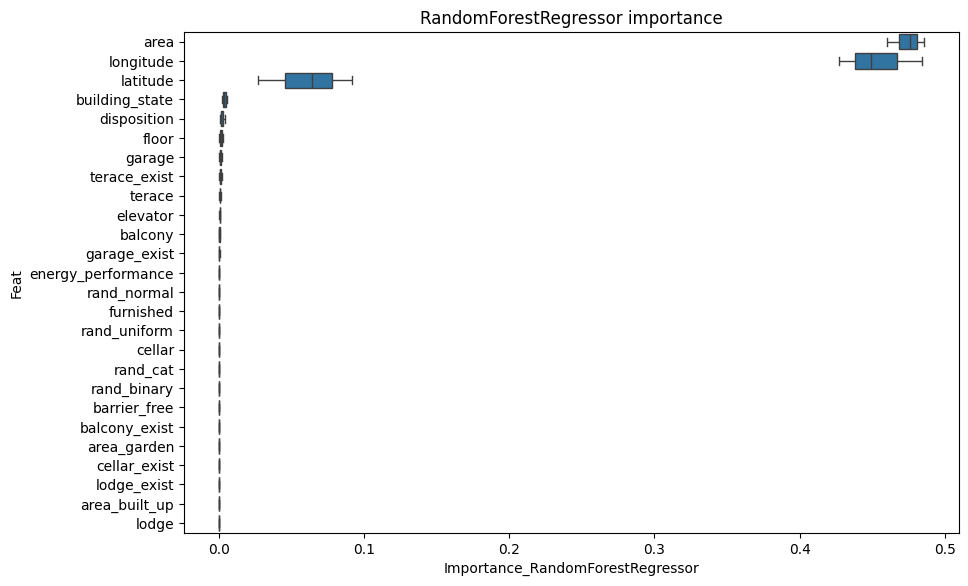

In [413]:
CATEGORICAL_TRESH = 10
REGRESSION_TRESH = 4
YCOL = 'price'
features = ['disposition', 'building_state',
       'floor', 'area', 'energy_performance', 'balcony_exist', 'balcony',
       'elevator', 'cellar_exist', 'cellar', 'furnished', 'barrier_free',
       'lodge_exist', 'lodge', 'terace_exist', 'terace', 'area_built_up',
       'area_garden', 'garage_exist', 'garage', 'latitude','rand_binary', 'rand_cat',
       'rand_uniform', 'rand_normal','longitude']
importance_RF = RF_importance(df, features, YCOL, sample = 0.8)